
# Introducción

En este trabajo se presenta una herramienta que permite visualizar tanto el desempeño de los **[11 sectores que conforman el S&P 500](https://www.sectorspdrs.com/)** (SPDR ETFs), como el comportamiento individual de las acciones que conforman estos sectores.  

Este  código está compuesto por tres secciones. En la primera sección se muestra el rendimiento de los ETFs del S&P 500 con una gráfica de barras horizontales. En la sección dos se carga una lista con información de las empresas que conforman el benchmark, para posteriormente seleccionar un sector y visualizar las acciones dentro del mismo de forma dinámica (con la ayuda de una gráfica en plotly). En la tercera sección se encuentran las funciones que permiten el desarrollo del código de manera ordenada, parametrizada y ajustable.  

Junto a la generación de gráficas y obtención de precios, entre las funciones diseñadas está disponible la opción de calcular el [Sharpe Ratio](https://www.investopedia.com/terms/s/sharperatio.asp) y el [Sortino Ratio](https://www.investopedia.com/terms/s/sortinoratio.asp), indicadores financieros que agregan información sobre la relación riesgo-beneficio de los instrumentos financieros. Asimismo, también se puede encontrar una función que realiza un [mapa térmico de correlaciones](https://www.probabilidadyestadistica.net/matriz-de-correlacion/) y una función que calcula las medias móviles ([SMA](https://www.investopedia.com/terms/s/sma.asp) y [EMA](https://www.investopedia.com/terms/e/ema.asp)) para los instrumentos financieros.

La información de los precios de los ETF y Acciones fueron obtenidos con la ayuda de la librería YFINANCE. Las gráficas fueron elaboradas utilizando tanto MATPLOTLIB y PLOTLY. El manejo de tablas fue hecho con PANDAS y algunas operaciones matemáticas fueron realizadas con NUMPY. 

Para un buen funcionamiento del código, primero se deben importar las librerías y posteriormente correr la tercera sección del código que corresponde a las funciones. 

Cabe mencionar que este código fue elaborado en el entorno  de programación de Jupyter Notebook.


<br>

---

<br>

### Librerías

Antes de comenzar, se muestran un par de líneas de código útiles para cargar las librerías de trabajo.

Para instalar/actualizar las librerías se puede usar:


In [ ]:
#!pip install yfinance
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

#!pip install -U kaleido
#!pip install kaleido

#!pip install --upgrade yfinance
#!pip install --upgrade matplotlib
#!pip install --upgrade plotly
#!pip install --upgrade kaleido

<br>

Para importar las librerías se usa:

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.graph_objects as go
import seaborn as sns
import kaleido

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import PercentFormatter

<br>

---

<br>

### Primera parte: S&P 500 y sus sectores
En esta sección se puede visualizar en una gráfica de barras el rendimiento de los sectores del S&P 500 en un rango de tiempo definido. De igual forma se puede visualizar los datos con una gráfica de líneas. Como complementos, se puede obtener una tabla de correlaciones entre sectores y el benchmark, y por último, se puede calcular el Sharpe Ratio y el Sortino Rartio de los sectores. 

<br>

Comenzamos declarando la lista de Tickers de los sectores:


In [24]:
lista_etfs = pd.DataFrame([
    {"Sector": "Utilities", "Ticker": "XLU"},
    {"Sector": "Technology", "Ticker": "XLK"},
    {"Sector": "Real Estate", "Ticker": "XLRE"},
    {"Sector": "Materials", "Ticker": "XLB"},
    {"Sector": "Industrials", "Ticker": "XLI"},
    {"Sector": "Health Care", "Ticker": "XLV"},
    {"Sector": "Financials", "Ticker": "XLF"},
    {"Sector": "Energy", "Ticker": "XLE"},
    {"Sector": "Consumer Staples", "Ticker": "XLP"},
    {"Sector": "Consumer Discretionary", "Ticker": "XLY"},
    {"Sector": "Communication Services", "Ticker": "XLC"}])

#resultado
#lista_etfs

<br>

En el siguiente bloque de código se muestran las funciones que permiten obtener los precios de los instrumentos financieros seleccionados, en un rango de tiempo específico, y con la opción de agregar el benchmark (el índice S&P 500). Posteriormente se obtienen los rendimientos (rendimientos aritméticos para muestras de menos de 21 días y rendimientos logarítmicos para muestras de más de 21 días) y finalmente se grafican los resultados. 


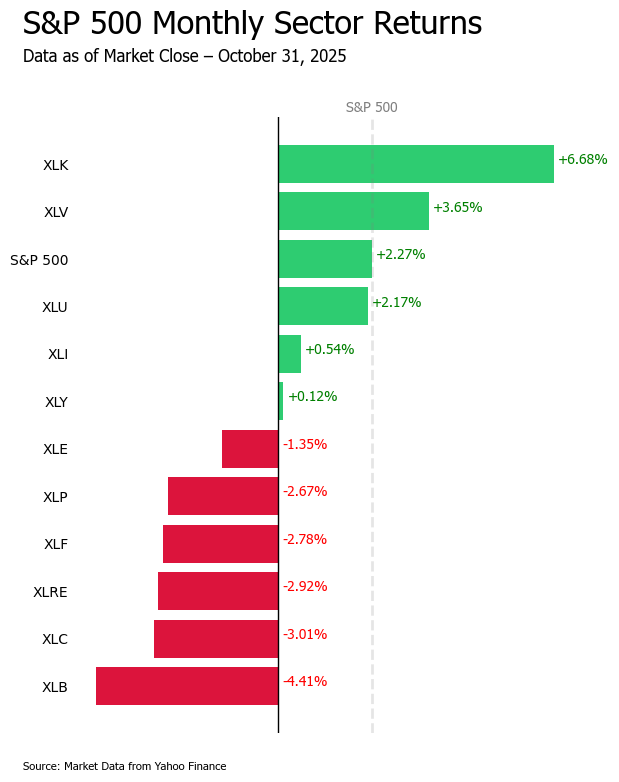

In [26]:
#llamamos a la funcion que obtiene los precios de los tickers
tabla_de_precios= obtener_precios(inicio= "2025-09-30", fin= "2025-10-31", tickers= lista_etfs["Ticker"], with_benchmark= True)
#display(tabla_de_precios)

#aplicamos la funcion que determina el rendimiento acumulado
tabla_rendimientos= rendimiento_acumulado(tabla_de_precios)
#display(tabla_rendimientos)

#usamos la funcion que genera la grafica de barras horizontales
grafica_barras_h(tabla_rendimientos, ordenar_rendimientos= True, descargar_img= True, 
                titulo= "S&P 500 Monthly Sector Returns",  
                subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")
                            
                            #Rendimiento semanal del 25 al 29 de agosto de 2025
                            #Rendimiento durante el mes de septiembre de 2025

                            #S&P 500 Weekly Sector Returns
                            #Data as of Market Close – October 24, 2025


<br>

De la misma manera, en vez de presentar los datos en una gráfica de barras horizontales, se puede optar por usar una gráfica de líneas como se muestra a continuación.


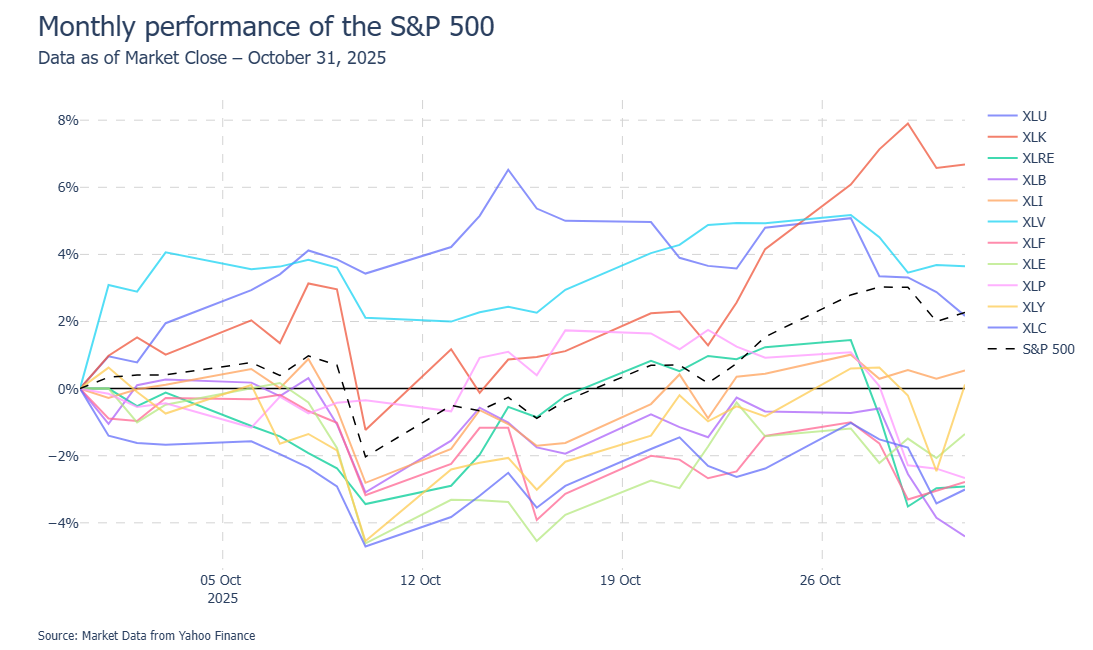

In [27]:
#funcion que genera la grafica de lineas
grafica_lineas(tabla_rendimientos, descargar_img= True,
               titulo= "Monthly performance of the S&P 500",
               subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")


<br>

Para visualizar de forma rápida la relación entre los comportamientos de los sectores podemos crear una tabla de correlaciones llamando a la función correspondiente: 


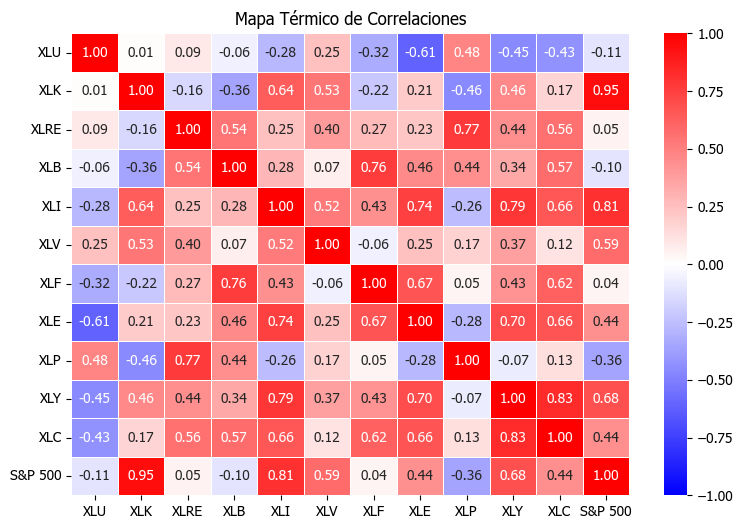

In [28]:
#funcion para crear el mapa de calor de correlaciones
mapa_termico_correlaciones(tabla_rendimientos, tipo= "bwr") #opciones: seismic, RdBu, bwr


<br>
Para finalizar esta sección, se muestra el uso de las funciones que calculan los indicadores financieros de Sharpe y Sortino Ratio:


In [30]:
#funcion que calcula el sharpe ratio
sharpe= sharpe_ratio(tabla_de_precios)
sharpe.round(2)

,Rendimiento en el periodo,Volatilidad en el periodo,Sharpe Ratio en el periodo
XLU,2.17,3.94,0.45
XLK,6.68,6.81,0.93
XLRE,-2.92,4.81,-0.69
XLB,-4.41,4.88,-0.98
XLI,0.54,4.45,0.04
XLV,3.65,4.19,0.78
XLF,-2.78,5.05,-0.63
XLE,-1.35,5.17,-0.34
XLP,-2.67,3.95,-0.77
XLY,0.12,6.41,-0.04


In [34]:
#funcion que calcula el sortino ratio
sortino= sortino_ratio(tabla_de_precios)
sortino.round(2)

,Rendimiento en el periodo,Volatilidad en el periodo,Sortino Ratio en el periodo
XLU,1.87,2.39,0.78
XLK,6.53,6.35,1.03
XLRE,-3.17,4.18,-0.76
XLB,-4.65,3.19,-1.46
XLI,0.27,3.22,0.08
XLV,3.36,2.31,1.45
XLF,-3.02,4.48,-0.67
XLE,-1.59,3.97,-0.40
XLP,-2.95,2.82,-1.05
XLY,-0.05,4.01,-0.01


<br>

---

<br>

### Segunda parte: Dentro de los Sectores

En esta sección se carga una tabla con la información de las empresas que componen el índice S&P 500, de entre la cual conoceremos su ticker y el sector en el que se encuentran. Después podemos seleccionar un sector y ver su comportamiento.

<br>

Comenzamos instalando/importando las librerías necesarias para esta segunda parte del código:


In [36]:
#Para instalar/actualizar las librerías se puede usar la siguientes lineas de código:
#!pip install bs4

#Las librerías que se importan son
import requests
from bs4 import BeautifulSoup
from io import StringIO

#Nota: la libreria io ya deberia estar integrada en python en Jupyter Notebook
 

<br>

Obtenemos la lista de información de las empresas desde una **[tabla en Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)**. Para esto, vamos a usar las librerías **[pandas.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)**, **[bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)** e **[io](https://docs.python.org/3/library/io.html)**:

In [38]:
#definimos el url y el header de la petición
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}

#hacemos la solicitud
respuesta = requests.get(url, headers=headers)

#guardamos la respuesta como un objeto de bs4
soup = BeautifulSoup(respuesta.text, "html.parser")

#pasamos el objeto de bs4 a texto html
html_io = StringIO(str(soup))

#pasamos el texto html a un pd.DataFrame
tablas = pd.read_html(html_io)

#seleccionamos la tabla que contiene la informacion que necesitamos
tabla_con_simbolos = tablas[0]

#cambiamos dos simbolos 
tabla_con_simbolos["Symbol"]= tabla_con_simbolos["Symbol"].replace({"BRK.B": "BRK-B", "BF.B": "BF-B"})

#resultado
tabla_con_simbolos


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


<br>

Filtramos y renombramos las columnas de la tabla de datos. Pueden conocer más acerca de la [taxonomía de clasificación del GICS aquí](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard).


In [39]:
#Seleccionamos las columnas de la tabla que nos interesan
info_empresas= tabla_con_simbolos[["Symbol", "Security", "GICS Sector", "GICS Sub-Industry", "Date added"]]

#cambiamos el nombre de las columnas de la tabla
info_empresas= info_empresas.rename(columns={"Symbol": "Ticker", "Security":"Nombre", "GICS Sector": "Sector",
                                             "GICS Sub-Industry": "Subindustria", "Date added": "Fecha de ingreso"})

#resultado
#info_empresas


<br>

A continuación se muestra un resumen descriptivo del contenido de la tabla.

In [42]:
info_empresas.describe()


,Ticker,Nombre,Sector,Subindustria,Fecha de ingreso
count,503,503,503,503,503
unique,503,503,11,129,373
top,MMM,3M,Industrials,Health Care Equipment,1957-03-04
freq,1,1,79,17,53


<br>

En la siguiente tabla tenemos los sectores y la cantidad de empresas que lo constituyen.

In [44]:
tabla_distri_sectores= pd.DataFrame(info_empresas["Sector"].value_counts()).rename(columns= {"count": "Cantidad"})
tabla_distri_sectores


,Cantidad
Sector,
Industrials,79
Financials,75
Information Technology,68
Health Care,60
Consumer Discretionary,49
Consumer Staples,37
Utilities,31
Real Estate,31
Materials,27


<br>

Ahora seleccionamos el sector que se desea analizar:

In [46]:
#definimos el sector que queremos visualizar
seleccion= "Energy"

#filtramos las empresas del sector para formar el grupo de analisis
grupo_analisis= info_empresas[info_empresas["Sector"]== seleccion]

#resultado
grupo_analisis

,Ticker,Nombre,Sector,Subindustria,Fecha de ingreso
36,APA,APA Corporation,Energy,Oil & Gas Exploration & Production,1997-07-28
55,BKR,Baker Hughes,Energy,Oil & Gas Equipment & Services,2017-07-07
98,CVX,Chevron Corporation,Energy,Integrated Oil & Gas,1957-03-04
117,COP,ConocoPhillips,Energy,Oil & Gas Exploration & Production,1957-03-04
128,CTRA,Coterra,Energy,Oil & Gas Exploration & Production,2008-06-23
143,DVN,Devon Energy,Energy,Oil & Gas Exploration & Production,2000-08-30
145,FANG,Diamondback Energy,Energy,Oil & Gas Exploration & Production,2018-12-03
169,EOG,EOG Resources,Energy,Oil & Gas Exploration & Production,2000-11-02
171,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,2022-10-03
182,EXE,Expand Energy,Energy,Oil & Gas Exploration & Production,2025-03-24


<br>

Obtenemos la información financiera y graficamos con ayuda de las funciones:

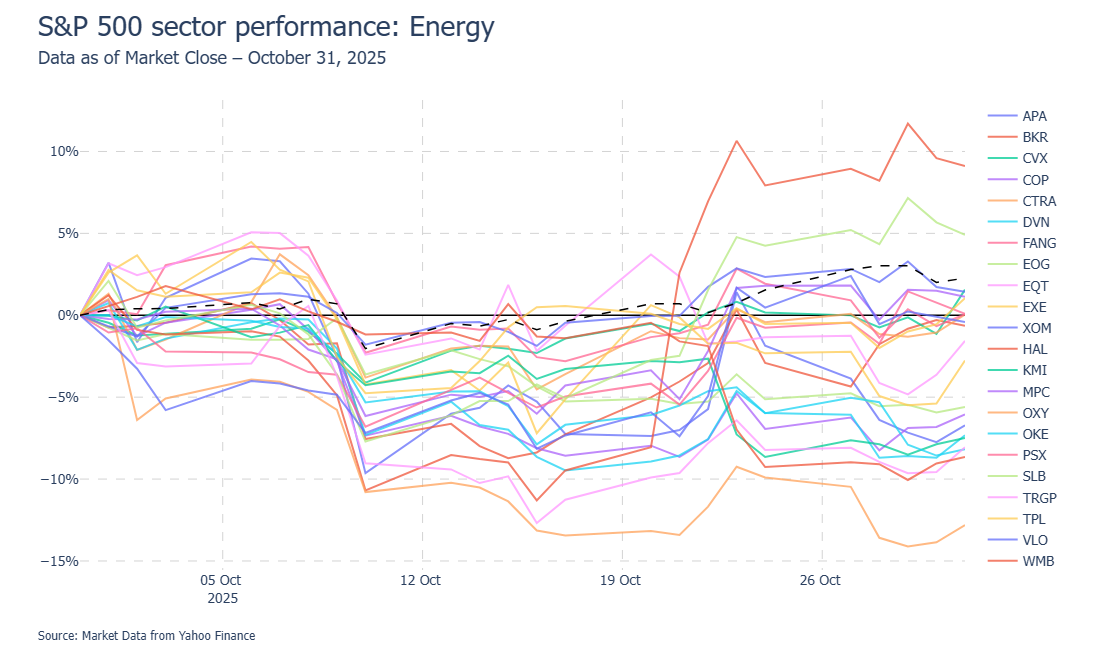

In [60]:
#llamamos a la funcion que obtiene los precios de los tickers
tabla_de_precios= obtener_precios(inicio= "2025-09-30", fin= "2025-10-31", tickers= grupo_analisis["Ticker"], with_benchmark= True)

#aplicamos la funcion que determina el rendimiento acumulado
tabla_rendimientos= rendimiento_acumulado(tabla_de_precios)

#usamos la funcion que genera la grafica de lineas
grafica_lineas(tabla_rendimientos, descargar_img= True, 
               titulo= f"S&P 500 sector performance: {seleccion}",
               subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")


In [61]:
#calculamos el sharpe ratio
sharpe= sharpe_ratio(tabla_de_precios).round(2)
sharpe_ordenado= sharpe.sort_values(by= "Rendimiento en el periodo", ascending=False).head(7)

#resultado
sharpe_ordenado

,Rendimiento en el periodo,Volatilidad en el periodo,Sharpe Ratio en el periodo
HAL,9.11,16.15,0.54
SLB,4.92,9.84,0.46
S&P 500,2.27,4.23,0.45
CVX,1.56,5.17,0.23
XOM,1.43,5.10,0.21
MPC,1.13,8.15,0.09
TPL,1.04,8.77,0.08


In [62]:
#calculamos el sortino ratio
sortino= sortino_ratio(tabla_de_precios).round(2)
sortino_ordenado= sortino.sort_values(by= "Sortino Ratio en el periodo", ascending=False).head(5)

#resultado
sortino_ordenado

,Rendimiento en el periodo,Volatilidad en el periodo,Sortino Ratio en el periodo
HAL,10.06,7.98,1.26
SLB,5.01,6.17,0.81
CVX,1.32,2.40,0.55
S&P 500,1.98,4.01,0.49
XOM,1.18,2.65,0.45



<br>

Una vez tenemos identificados aquellas acciones dentro de un sector que tienen el mejor rendimiento en un tiempo dado, podemos graficar únicamente estas empresas para ver su comportamiento en otros horizontes temporales.

En el siguiente bloque de código se grafican las empresas que tienen o el mayor rendimiento en el periodo o el mejor valor de Sharpe Ratio:


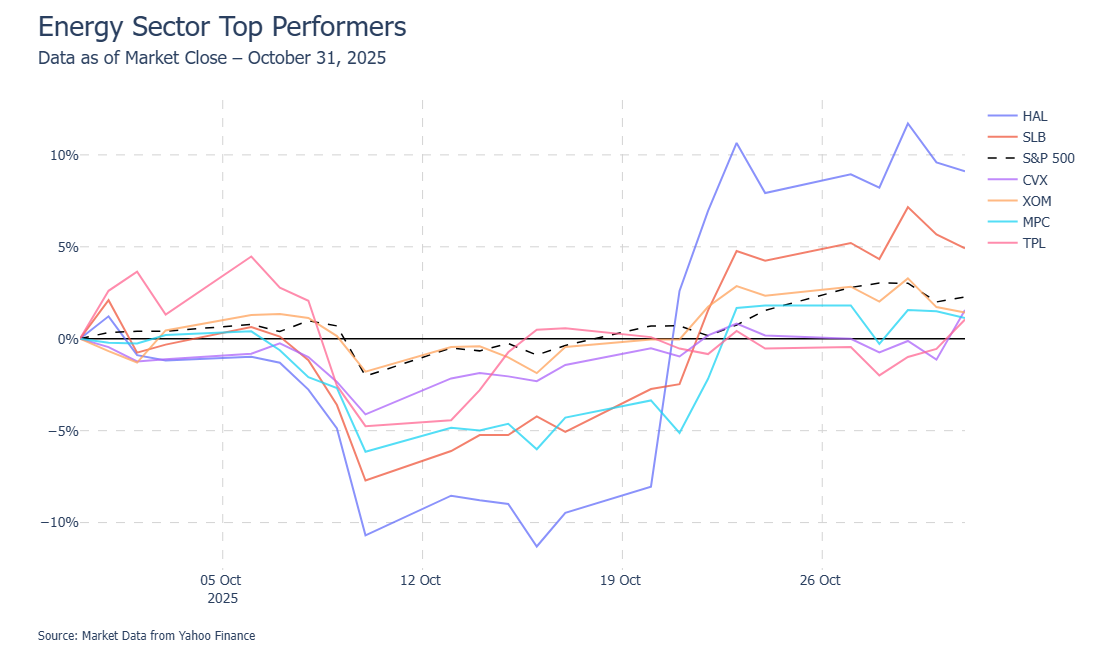

In [66]:
#funcion que genera la grafica de lineas
grafica_lineas(tabla_rendimientos[sharpe_ordenado.index.tolist()], descargar_img= True,
                titulo= f"{seleccion} Sector Top Performers", 
                subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")


<br>

---

<br>

#### Recurso extra 1/2


Para finalizar, en las siguientes líneas de código se muestra otro ejemplo del uso que se le puede dar a este código. Comenzamos declarando la lista de las empresas que componen al grupo de las siete magníficas, agregamos los ETF del S&P 500 y Nasdaq, y hacemos la solicitud de información.


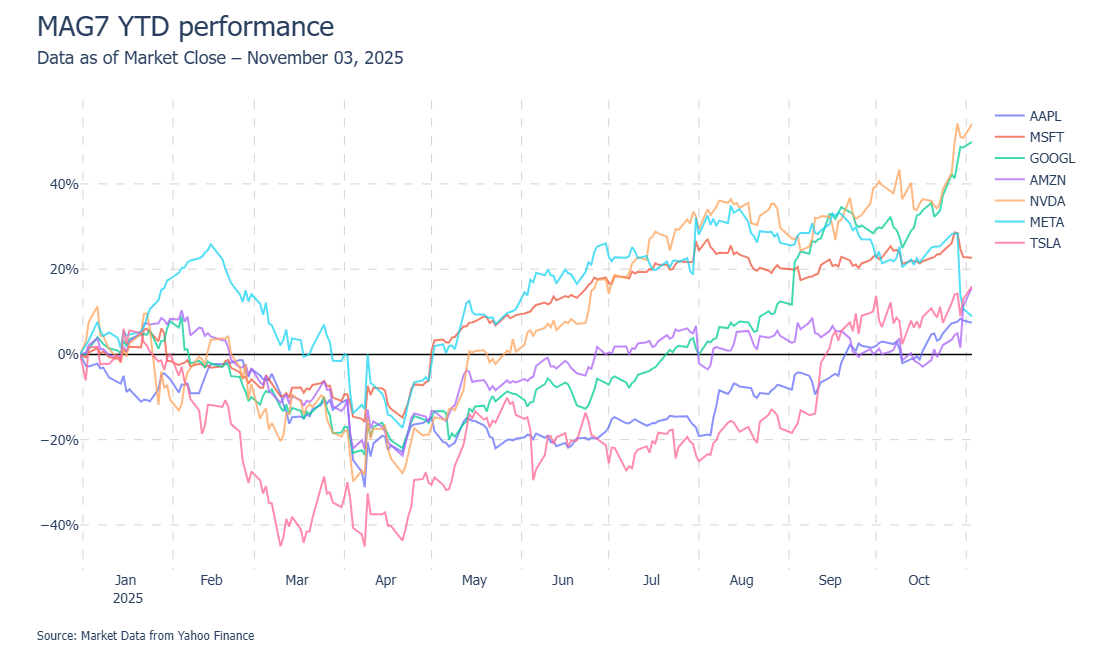

In [73]:
#Declaramos una lista de tickers que conforman la muestra:
portafolio = pd.DataFrame([
    #{"Nombre": "S&P 500",   "Ticker": "SPY"},
    #{"Nombre": "Nasdaq",  "Ticker": "QQQ"},
    
    {"Empresa": "Apple",        "Ticker": "AAPL",  "Sector": "Technology"},
    {"Empresa": "Microsoft",    "Ticker": "MSFT",  "Sector": "Technology"},
    {"Empresa": "Alphabet",     "Ticker": "GOOGL", "Sector": "Communication Services"},
    {"Empresa": "Amazon",       "Ticker": "AMZN",  "Sector": "Consumer Discretionary"},
    {"Empresa": "NVIDIA",       "Ticker": "NVDA",  "Sector": "Technology"},
    {"Empresa": "Meta",         "Ticker": "META",  "Sector": "Communication Services"},
    {"Empresa": "Tesla",        "Ticker": "TSLA",  "Sector": "Consumer Discretionary"}
    ])

#Obtenemos los precios y realizamos la grafica de lineas correspondiente
tabla_de_precios= obtener_precios(inicio= "2024-12-31", fin= "hoy", tickers= portafolio["Ticker"], with_benchmark= False)

#aplicamos la funcion que determina el rendimiento acumulado
tabla_rendimientos= rendimiento_acumulado(tabla_de_precios)

#usamos la funcion que genera la grafica
grafica_lineas(tabla_rendimientos, descargar_img= True,
               titulo= "MAG7 YTD performance", 
               subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")


<br>

---

<br>

#### Recurso extra 2/2

A continuación se presenta un ejemplo de cómo se puede agregar las medias móviles para una acción con ayuda de una función. 
En este caso, la acción seleccionada fue Reddit $RDDT. La función permite agregar tanto SMA o EMA a los días que se indiquen en las variables de la función:

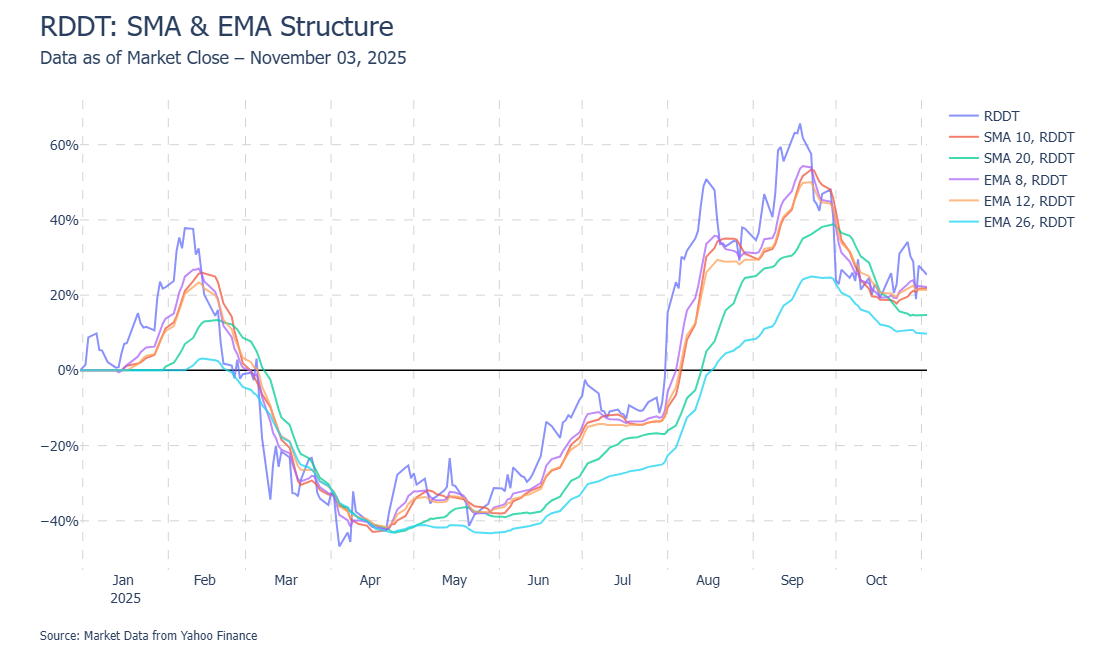

In [74]:
#Declaramos una lista de tickers que conforman la muestra:
portafolio = pd.DataFrame([
    {"Ticker": "RDDT"},
    #{"Ticker": "AMD"},
    ])

#Obtenemos los precios y realizamos la grafica de lineas correspondiente
tabla_de_precios= obtener_precios(inicio= "2024-12-31", fin= "today", tickers= portafolio["Ticker"], with_benchmark= False)

#agregamos la funcion que calcula los promedios moviles
moving_average(tabla_de_precios, sma= [10, 20], ema=[8, 12, 26])

#aplicamos la funcion que determina el rendimiento acumulado
tabla_rendimientos= rendimiento_acumulado(tabla_de_precios)

#usamos la funcion que genera la grafica
grafica_lineas(tabla_rendimientos, descargar_img= True,
               titulo= f"{portafolio["Ticker"].iloc[0]}: SMA & EMA Structure", 
               subtitulo= f"Data as of Market Close – {tabla_rendimientos.index[-1].strftime("%B %d, %Y")}")



<br>

---

<br>

### Funciones

En esta sección se encuentran las funciones que se utilizaron durante el desarrollo de este proyecto.

En orden de aparición, las funciones que contiene este código son:

    A) obtener_precios(inicio: str, fin: str, tickers: pd.DataFrame, with_benchmark: bool) -> pd.DataFrame:

    B) rendimiento_acumulado(tabla: pd.DataFrame) -> pd.DataFrame:
    
    C) grafica_barras_h(tabla: pd.DataFrame, ordenar_rendimientos: bool, descargar_img: bool, titulo: str, subtitulo: str):
    
    D) lista_colores(tabla: pd.DataFrame) -> list:
    
    E) grafica_lineas(tabla: pd.DataFrame, descargar_img: bool, titulo: str, subtitulo: str):
    
    F) mapa_termico_correlaciones(tabla: pd.DataFrame, tipo: str):
    
    G) sharpe_ratio(tabla: pd.DataFrame) -> pd.DataFrame:
    
    H) H) risk_free_rate(tabla: pd.DataFrame) -> pd.Series:
    
    I) sortino_ratio(tabla: pd.DataFrame) -> pd.DataFrame:
    
    J) moving_average(tabla, sma: list, ema: list):

<br>

--- 



In [3]:
# A) Funcion para obtener los precios de los instrumentos financieros

def obtener_precios(inicio: str, fin: str, tickers: pd.DataFrame, with_benchmark: bool) -> pd.DataFrame:

    """
    Esta función obtienen los precios de una lista de instrumentos financieros  
    
    Insumos:
    1) inicio. fecha del primer día en que se obtendra la informacion. Debe ser un dato tipo string en formato YYYY-MM=DD.
    Nota: Dado que el primer dia se pierde al sacar rendimientos, se sugiere comenzar con un día previo
            
    2) fin. fecha del ultimo dia en que se obtendra la informacion. Debe ser un dato tipo string en formato YYYY-MM=DD,
    o en su defecto, puede ser texto que diga "hoy" o "today"
        
    3) tickers. de los instrumentos de los que se quiere obtener los precios de cierre. Debe ser una columna de
    un pd.Dataframe. La función lo pasa a lista
        
    4) with_benchmark. declarar si queremos agregar el benchmark del mercado. Es una variable booleana. 
    El benchmark que se agrega es el valor del índice S&P 500 (^GSPC)
        
    Resultado:
    Un pd.DataFrame con los precios de los instrumentos financieros seleccionados y en la fecha indicada


    """
    
    #convertimos la columna del DataFrame en una lista
    lista_tickers= tickers.tolist()
    
    #declaramos la lista que va a almacenar el precio de cada ticker
    lista= []

    #definimos la ultima fecha en que se traera los precios
    if fin== "hoy" or fin== "today":
        fecha_fin= False
    
    else:
        fecha_fin = (pd.to_datetime(fin) + pd.Timedelta(days=1)).strftime("%Y-%m-%d")

    #obtenemos el precio de cierre de cada ticker en la lista
    for simbolo in lista_tickers:
        rawdata= yf.Ticker(simbolo).history(start= inicio, end= fecha_fin, auto_adjust= False)
        rawdata.rename(columns={"Close": simbolo}, inplace=True)
        lista.append(rawdata[simbolo])
        
    #agregamos el benchmark
    if with_benchmark:
        benchmark= yf.Ticker("^GSPC").history(start= inicio, end= fecha_fin, auto_adjust= False)
        benchmark.rename(columns={"Close": "S&P 500"}, inplace=True)
        lista.append(benchmark["S&P 500"])

    #concatenamos las listas de precios en un pd.DataFrame
    tabla = pd.concat(lista, axis=1)

    #removemos el componente time-zone de la fecha que entrega yfinance
    tabla.index = tabla.index.tz_localize(None)
    
    #los datos de YFINANCE ya tienen el formato de fecha
    tabla.index = pd.to_datetime(tabla.index, format= "%Y-%m-%d") 
    
    #cambiamos el nombre del indice a Fecha
    tabla.index.name = "Fecha"
    
    #resultado
    return tabla
        

In [4]:
# B) Funcion para calcular el rendimiento acumulado de los instrumentos financieros

def rendimiento_acumulado(tabla: pd.DataFrame) -> pd.DataFrame:

    """
    Esta función realiza las operaciones necesarias para calcular el rendimiento diario de 
    los instrumentos financieros y los suma para conocer el rendimiento acumulado 
        
    Insumos:
    1) tabla con los precios de los instrumentos. Debe ser un pd.DataFrame
        
    Resultado:
    Un pd.DataFrame con los precios en porcentaje

    
    """
    #dependiendo del tamaño de la muestra se utiliza un tipo de rendimiento.
    
    if len(tabla) <= 22:   #dias promedio en que opera el mercado al mes + 1
        #calculamos el rendimiento simple
        rendimiento_diario= ((tabla/tabla.shift(1))- 1).fillna(0)

        #sumamos los rendimientos diarios
        rendimiento_acumulado=  rendimiento_diario.cumsum()*100
    
    else:
        #calculamos el rendimiento logaritmico
        rendimiento_diario= np.log(tabla/tabla.shift(1)).fillna(0)

        #acumulamos los rendimientos diarios
        rendimiento_acumulado= (np.exp(rendimiento_diario.cumsum())-1)*100
    
    #resultado
    return rendimiento_acumulado
        

In [5]:
# C) Funcion que muestra una grafica de barras horizontal

def grafica_barras_h(tabla: pd.DataFrame, ordenar_rendimientos: bool, descargar_img: bool, titulo: str, subtitulo: str):

    """
    Esta función abarca los procedimientos necesarios para mostrar una gráfica de barras horizontales.
    En este caso, la grafica va a mostrar el desempeño de los sectores del S&P 500 
        
    Insumos:
    1) tabla con el rendimiento de los sectores del S&P 500. Debe ser un pd.DataFrame
    
    2) ordenar_rendimientos. declarar si queremos la gráfica ordenada de mayor a menor rendimiento. 
    Es una variable booleana.
    
    3) descargar_img. declarar si queremos descargar la gráfica. Los parámetros están al final de la función. 
    Es una variable booleana.
    
    4) titulo. texto que se muestra como título de la gráfica. En este espacio se puede poner la fecha 
    en que se trae los datos, como YTD, trimestral o mensual. Debe ser un dato tipo string
    
    5) subtitulo. texto que se muestra como el subtítulo de la gráfica. Debe ser un dato tipo string
            
    Resultado:
    Gráfica de barras horizontales que muestra el desempeño de los sectores  del S&P 500

    
    """

    #ordenamos los datos de la tabla
    if ordenar_rendimientos:
        tabla= tabla[tabla.iloc[-1].sort_values(ascending= True).index]
    
    #declaramos la figura
    fig, ax = plt.subplots(figsize=(6.5, 8)) #se define el tamaño 

    #seleccionamos el tipo de letra
    plt.rcParams["font.family"] = "Tahoma"  #opciones: arial, times new roman, Tahoma
    
    #definimos los colores
    fig.patch.set_facecolor("#FFFFFF")  #en codigo hexadecimal
    plt.gca().set_facecolor("#FFFFFF")  #E9E6DF
    
    #removemos los bordes
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    #agregamos la linea del eje Y
    ax.axvline(x= 0, color= "black", linestyle= "-", linewidth= 1)
    
    #quitamos las lineas de fondo/guia
    plt.grid(False)
    
    
    
    #agregamos la grafica
    plt.barh(tabla.columns, tabla.iloc[-1], color= lista_colores(tabla))   #lista_colores es otra funcion
    
    #agregamos el txt del rendimiento
    for sector in tabla.columns:
        variable1= tabla[sector].iloc[-1]
    
        if variable1 > 0:
            plt.text(x= variable1 + 0.1, y= sector, s= f"+{round(variable1, 2)}%", 
                 fontsize= 10, color= "green", ha= "left")
        else: 
            plt.text(x= 0.1, y= sector, s= f"{round(variable1, 2)}%", 
                 fontsize= 10, color= "red", ha= "left")

    #si tenemos el benchmark en la tabla, agregamos txt y linea guia
    if "S&P 500" in tabla.columns:
        
        #linea punteada que muestra el rendimiento del mercado
        ax.axvline(x= tabla["S&P 500"].iloc[-1], color= "gray", linestyle= "--", linewidth= 2, alpha= 0.2)
    
        #nombre sobre la linea que muestra el rendimiento del mercado
        plt.text(x= tabla["S&P 500"].iloc[-1], y= 12.1 , s= "S&P 500", fontsize= 10, color= "gray", ha= "center")
        
    
    
    #diseño de la grafica
    #titulo
    plt.text(x= -0.1, y= 1.135 , s= titulo, fontsize= 23, transform=plt.gca().transAxes)
    
    #subtitulo
    plt.text(x= -0.1, y= 1.09 , s= subtitulo, fontsize= 12, transform=plt.gca().transAxes)
    
    #fuente
    plt.text(x= -0.1, y= -0.06 , s= "Source: Market Data from Yahoo Finance", fontsize= 8, transform=plt.gca().transAxes)
    #fuente: Datos obtenidos de Yahoo Finance
    
    
    #quitamos la escala del eje X
    ax.set_xticks([])
    
    #quitamos las marcas de los ejes
    ax.tick_params(axis="x", which= "major", length=0)  
    ax.tick_params(axis="y", which= "major", length=0)  
    
    #línea de código para descargar la gráfica como archivo .png:
    if descargar_img:
        plt.savefig("grafica_barras.png", dpi=300, bbox_inches= "tight", transparent= False)
    
    return plt.show()   
    

In [6]:
#D) Funcion complementaria de la funcion (C). Esta funcion determina los colores que se usan en la grafica de barras

def lista_colores(tabla: pd.DataFrame) -> list:

    """
    Esta función complementa al proceso de creación de la gráfica de barras horizontal.
    Esta función determina si los rendimientos son positivos o negativos, y crea una lista de colores para mostrar en la gráfica 
        
    Insumos:
    1) tabla con el rendimiento de los sectores del S&P 500. Debe ser un pd.DataFrame
            
    Resultado:
    Lista con el color que le corresponde a cada rendimiento

    
    """

    #declaramos la lista que va a almacenar los colores
    colores= []

    #determinamos si el rendimiento de cada sector es positivo o negativo
    for sector in tabla.columns:
        if tabla[sector].iloc[-1] > 0:
            colores.append("#2ecc71") #en codigo hexadecimal es un tipo de verde
        
        else:
            colores.append("#DC143C") #en codigo hexadecimal es un tipo de rojo
            
    return colores
    

In [7]:
# E) Funcion que muestra una grafica de lineas

def grafica_lineas(tabla: pd.DataFrame, descargar_img: bool, titulo: str, subtitulo: str):

    """
    Esta función realiza los procedimientos necesarios para mostrar una gráfica de líneas
    
    Insumos:
    1) tabla con el rendimiento de los activos financieros. Debe ser un pd.DataFrame
    
    2) descargar_img. declarar si queremos descargar la gráfica. Los parámetros están al final de la función. 
    Es una variable booleana.
    
    3) titulo. texto que se muestra como título de la gráfica. En este espacio se puede poner la fecha 
    en que se trae los datos, como YTD, trimestral o mensual. Debe ser un dato tipo string
    
    4) subtitulo. texto que se muestra como el subtítulo de la gráfica. Debe ser un dato tipo string
            
    Resultado:
    Grafica de líneas que muestra el desempeño de los instrumentos financieros seleccionados

    
    """

    #establecemos la figura
    fig = go.Figure()
    
    #graficamos los valores
    for simbolo in tabla.columns:      
        if simbolo == "S&P 500":
          fig.add_trace(go.Scatter(x= tabla.index.to_pydatetime().tolist(), y= tabla["S&P 500"],
          mode= "lines", line= dict(width= 1.5, dash= "dash", color= "black"), name= "S&P 500"))
    
        else:
          fig.add_trace(go.Scatter(x= tabla.index.to_pydatetime().tolist(), y= tabla[simbolo],
          mode= "lines", line= dict(width= 2, dash= "solid"), opacity= 0.75, name= simbolo))
    
    #diseño de la grafica
    fig.update_layout(
        font=dict(size=14, family= "Tahoma"),      #opciones: Arial, Courier New, Verdana, Helvetica, Georgia

        plot_bgcolor= "#FFFFFF", #en codigo hexadecimal
        paper_bgcolor= "#FFFFFF", #E9E6DF
        width= 1050,  #ancho fig #1050
        height= 650,  #alto fig #650
    
        xaxis=dict(
            gridcolor= "lightgrey",
            gridwidth= 1,
            griddash= "dash"),
    
        yaxis=dict(
            gridcolor= "lightgrey",
            gridwidth= 1,
            griddash= "dash",
            zeroline= True,          #línea sobre eje X, donde y(0)= 0
            zerolinecolor= "black",
            zerolinewidth= 1.5,
            showline= False,          #línea del eje y, costado izquierdo
            linewidth= 2,
            linecolor= "black",
            tickformat= "0.2", 
            ticksuffix= "%"),

        annotations=[
        #titulo
        dict(text= titulo, x= -0.05, y= 1.2, xref="paper", yref="paper",
            showarrow=False, font=dict(size= 28, family="Tahoma"), align= "left"),

        #subtitulo
        dict(text= subtitulo, x= -0.05, y= 1.12, xref="paper", yref="paper",
            showarrow=False, font=dict(size=18, family="Tahoma"), align="left"),

        #fuente: Datos obtenidos de Yahoo Finance
        dict(text= "Source: Market Data from Yahoo Finance", x= -0.05, y= -0.16, xref="paper", yref="paper",
            showarrow=False, font=dict(size=12, family="Tahoma"), align="left"),
        ])
    
    if len(tabla) >= 30:
        fig.update_xaxes(
            dtick= "M1",                 #intervalo de las etiquetas del eje x
            tickformat= "%b \n%Y",       #formato de mes y año en el eje x
            ticklabelmode= "period")     #posicion de las etiquetas, default: instant, otro: period
    else:
        fig.update_xaxes(
            tickformat= "%d %b \n%Y",    #formato de mes y año en el eje x
            ticklabelmode= "instant")    #posicion de las etiquetas, default: instant, otro: period
   
    if descargar_img:     
        fig.write_image("grafica_lineas.png", width= 1050, height= 650, scale= 4)
        
    return fig.show()
    


In [8]:
# F) Funcion que realiza la tabla de correlaciones

def mapa_termico_correlaciones(tabla: pd.DataFrame, tipo: str):

    """
    Esta función realiza los procedimientos necesarios para mostrar una gráfica con los coeficientes de correlación de Pearson
        
    Insumos:
    1) tabla con el rendimiento de los instrumentos financieros. Debe ser un pd.DataFrame
    
    2) tipo. Definimos el formato del rango de colores que muestra el mapa térmico. Algunas opciones son: seismic, RdBu, bwr.
    Es un dato tipo str.
            
    Resultado:
    Gráfica con el coeficiente de correlación de Pearson de los instrumentos financieros

    
    """

    #establecemos la figura
    plt.figure(figsize= (9, 6))
    
    #mapa termico
    sns.heatmap(tabla.corr(), annot= True, cmap= tipo,    #opciones: seismic, RdBu, bwr
                vmin= -1, vmax= 1, fmt= ".2f", linewidths= 0.5)
    
    #ajuste a las etiquetas del eje Y
    plt.yticks(rotation= 0)

    #titulo
    plt.title("Mapa Térmico de Correlaciones")
    
    #resultado
    return plt.show()


In [9]:
# G) Esta funcion calcula el Sharpe Ratio

def sharpe_ratio(tabla: pd.DataFrame) -> pd.DataFrame:

    """
    Esta función realiza los procedimientos correspondientes para calcular el Sharpe Ratio, lo cual incluye:
    a) rendimiento promedio diario de la muestra
    b) desviación estándar muestral
    c) Sharpe Ratio al periodo y anualizado     
    
    Insumos:
    1) tabla con el precio de los instrumentos financieros seleccionados. Debe ser un pd.DataFrame.
            
    Resultado:
    Tabla con el resumen de los valores para cada instrumento financiero 

    
    """
    
    #dependiendo del tamaño de la muestra se utiliza un tipo de rendimiento.
    #cantidad de elementos
    n= len(tabla)
        
    if n <= 22:   #dias promedio en que opera el mercado al mes + 1
        #calculamos el rendimiento simple
        rendimiento_diario= ((tabla/tabla.shift(1))- 1).dropna()
        rendimiento_periodo = np.prod(1 + rendimiento_diario, axis= 0) - 1
    
    else:
        #calculamos el rendimiento logaritmico
        rendimiento_diario= np.log(tabla/tabla.shift(1)).dropna()
        rendimiento_periodo= np.exp(rendimiento_diario.sum())-1


    #desviacion estandar 
    desv_stdr= rendimiento_diario.std(ddof= 1)

    #desviacion estandar perior
    desv_stdr_periodo= desv_stdr*(n**0.5)

    #tasa libre de riesgo
    rf_anual_promedio = risk_free_rate(tabla).mean()/100
    rf_diario = (1 + rf_anual_promedio)**(1/252) - 1
    rf_periodo = (1 + rf_diario)**n - 1
    
    #sharpe_ratio
    sharpe_ratio= (rendimiento_periodo - rf_periodo)/desv_stdr_periodo

    #creamos la tabla de resultados
    tabla_resultados = pd.DataFrame({
    "Rendimiento en el periodo": rendimiento_periodo * 100,
    "Volatilidad en el periodo": desv_stdr_periodo * 100,
    "Sharpe Ratio en el periodo": sharpe_ratio})
    
    #en caso de que haya mas de 8 meses de datos, el sharpe anualizado es el sig:
    if len(tabla) >= 168:
        #calculamos el rendimiento logaritmico
        rendimiento= np.log(tabla/tabla.shift(1)).dropna()
        rendimiento_promedio= rendimiento.mean()
        rendimiento_anual= np.exp(rendimiento_promedio*252)-1
        
        desv_stdr= rendimiento.std(ddof= 1)
        desv_stdr_anual= desv_stdr*(252**0.5)
        
        #sharpe_ratio
        sharpe_ratio_anual= (rendimiento_anual - (risk_free_rate(tabla).iloc[-1])/100)/desv_stdr_anual

        # Agregamos columnas al DataFrame existente
        tabla_resultados["Rendimiento anualizado"] = rendimiento_anual * 100
        tabla_resultados["Volatilidad anualizada"] = desv_stdr_anual * 100
        tabla_resultados["Sharpe Ratio anualizado"] = sharpe_ratio_anual
    
    #resultado
    return tabla_resultados


In [10]:
# H) Funcion complementaria de la funcion (G). Esta funcion obtiene el promedio del "U.S. 10 Year Treasury" Bond de EEUU

def risk_free_rate(tabla: pd.DataFrame) -> pd.Series:

    """
    Con esta función se obtiene el valor de los bonos del tesoro de EEUU a 10 años.
    (en yahoo el símbolo es: ^TNX) (como referencia, ver la pág de la CNBC: "U.S. 10 Year Treasury")  
    
    Para mantener el sentido de las fechas, el primer dia en que se obtiene el valor va a ser el mismo al declarado
    al usar la función de la tabla de precios
    
    Insumos:
    1) tabla con índice de fechas
        
    Resultado:
    Valor de la tasa libre de riesgo promedio a la fecha indicada


    """
    fecha_inicial= tabla.index[0].strftime("%Y-%m-%d")
    fecha_fin= tabla.index[-1]
    fecha_final= (pd.to_datetime(fecha_fin) + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
    
    data= yf.Ticker("^TNX").history(start= fecha_inicial, end= fecha_final, auto_adjust= False)
    
    data.index = data.index.tz_localize(None)

    #declaramos la tasa libre de riesgo para el sortino ratio
    tasa_libre_de_riesgo= data["Close"]

    #resultado
    return tasa_libre_de_riesgo


In [11]:
# G) Esta funcion calcula el Sortino Ratio

def sortino_ratio(tabla: pd.DataFrame) -> pd.DataFrame:

    """
    Esta función realiza los procedimientos correspondientes para calcular el Sortino Ratio, lo cual incluye:
    a) tasa libre de riesgo diaria
    b) rendimiento promedio diario
    c) rendimiento mínimamente aceptable o MAR (minimum acceptable return)
    d) rendimiento negativo
    e) desviación estandar ajustado
    f) Sharpe Ratio al periodo y anualizado     
    
    Insumos:
    1) tabla con el precio de los instrumentos financieros seleccionados. Debe ser un pd.DataFrame.
            
    Resultado:
    Tabla con el resumen de los valores para cada instrumento financiero 

    
    """
    
    #dependiendo del tamaño de la muestra se utiliza un tipo de rendimiento.
    #cantidad de elementos
    n= len(tabla)

    #tasa libre de riesgo
    rf_anuales = risk_free_rate(tabla)/100
    rf_diario = (1 + rf_anuales)**(1/252) - 1

    #obtenemos los rendimientos 
    rendimiento_diario= ((tabla/tabla.shift(1))- 1).dropna()

    #acotamos los rendimientos con un MAR (minimum acceptable return)
    rendimiento_acotado= rendimiento_diario.sub(rf_diario, axis=0)

    if n <= 22:   #dias promedio en que opera el mercado al mes + 1
        #calculamos el rendimiento simple
        rendimiento_periodo = np.prod(1 + rendimiento_acotado, axis= 0) - 1
    
    else:
        #calculamos el rendimiento logaritmico
        rendimiento_periodo= np.exp(rendimiento_acotado.sum())-1

    #seleccionamos los rendimientos negativos
    rendimiento_negativo= rendimiento_acotado[rendimiento_acotado < 0]
    
    #desviacion estandar 
    desv_stdr= rendimiento_negativo.std(ddof= 1)

    #desviacion estandar perior
    desv_stdr_periodo= desv_stdr*(n**0.5)

    #sharpe_ratio
    sortino_ratio= rendimiento_periodo/desv_stdr_periodo

    #creamos la tabla de resultados
    tabla_resultados = pd.DataFrame({
    "Rendimiento en el periodo": rendimiento_periodo * 100,
    "Volatilidad en el periodo": desv_stdr_periodo * 100,
    "Sortino Ratio en el periodo": sortino_ratio})
    
    
    #en caso de que haya mas de 8 meses de datos, el sortino ratio anualizado es el sig:
    if len(tabla) >= 168:
        #calculamos el rendimiento logaritmico
        rendimiento_diario= np.log(tabla/tabla.shift(1)).dropna()

        #acotamos los rendimientos con un MAR (minimum acceptable return)
        rendimiento_acotado= rendimiento_diario.sub(rf_diario, axis=0)
    
        rendimiento_anual = (1 + rendimiento_periodo)**(252 / n) - 1

        #seleccionamos los rendimientos negativos
        rendimiento_negativo= rendimiento_acotado[rendimiento_acotado < 0]

        #desviacion estandar 
        desv_stdr= rendimiento_negativo.std(ddof= 1)

        #desviacion estandar anual 
        desv_stdr_anual= desv_stdr*(252**0.5)
        
        #sortino_ratio
        sortino_ratio_anual= rendimiento_anual/desv_stdr_anual

        # Agregamos columnas al DataFrame existente
        tabla_resultados["Rendimiento anualizado"] = rendimiento_anual * 100
        tabla_resultados["Volatilidad anualizada"] = desv_stdr_anual * 100
        tabla_resultados["Sortino Ratio anualizado"] = sortino_ratio_anual
        
    #resultado
    return tabla_resultados


In [12]:
#J) esta funcion calcula tanto la media movil simple (SMA) como exponencial (EMA)

def moving_average(tabla: pd.DataFrame, sma: list, ema: list):

    """
    Esta función realiza los cálculos correspondientes para graficar tanto el  
    SMA (Simple Moving Average) como el EMA (Exponential Moving Average)
        
    Insumos:
    1) tabla con el precio de los instrumentos financieros seleccionados. Debe ser un pd.DataFrame
            
    2) sma. Es una lista con la cantidad de días en que calcula el SMA (ventana temporal). 
    Es una estructura de datos tipo lista
            
    3) ema. Es una lista con la cantidad de días en que calcula el EMA (ventana temporal)
    Es una estructura de datos tipo lista
            
    Resultado:
    Tabla original junto con los datos de las medias móviles para graficar

        
    """
    
    for ticker in tabla.columns:
        for dias in sma:
            tabla[f"SMA {dias}, {ticker}"]= tabla[ticker].rolling(window= dias).mean()

        for dias in ema:
            tabla[f"EMA {dias}, {ticker}"]= tabla[ticker].ewm(span=dias, min_periods= dias, adjust=False).mean()

    return tabla
    


<br>

---

<br>

Fin del código